<a href="https://colab.research.google.com/github/karencfisher/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [2]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-03-18 05:03:18--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.79.46
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.79.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.2’

instacart_online_gr 100%[===================>] 196.03M  47.5MB/s    in 4.1s    

2020-03-18 05:03:22 (47.5 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.2’ saved [205548478/205548478]



In [3]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
##### YOUR CODE HERE #####
# Import pandas, load the datasets that seem most appropriate, which inititially 
# would seem to be the products, to get pames and product_IDs, and the orders,
# to merge on product_id for the relevant items.

import pandas as pd

products_df = pd.read_csv('products.csv')

# the order_products datasets are in two, so concatenate into one order_producs_df
order_products_p_df = pd.read_csv('order_products__prior.csv')
order_products_t_df = pd.read_csv('order_products__train.csv')
order_products_df = pd.concat([order_products_p_df, order_products_t_df], axis=0)


In [17]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [18]:
order_products_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [19]:
# I think to limit the products datframe to just the items in question, just the
# relevant columns.
top_products = ['Banana',
                'Bag of Organic Bananas',
                'Organic Strawberries',
                'Organic Baby Spinach',
                'Organic Hass Avocado',
                'Organic Avocado',
                'Large Lemon',
                'Strawberries',
                'Limes',
                'Organic Whole Milk']

condition = products_df['product_name'].isin(top_products)
products_of_interest_df = products_df[condition]
products_of_interest_df = products_of_interest_df.drop(['aisle_id', 'department_id'], axis=1)
products_of_interest_df

,product_id,product_name
13175,13176,Bag of Organic Bananas
16796,16797,Strawberries
21136,21137,Organic Strawberries
21902,21903,Organic Baby Spinach
24851,24852,Banana
26208,26209,Limes
27844,27845,Organic Whole Milk
47208,47209,Organic Hass Avocado
47625,47626,Large Lemon
47765,47766,Organic Avocado


In [9]:
# Merge with order_products_df, on product_id, inner, limiting output to just relevant columns
orders_of_interest_df = pd.merge(products_of_interest_df, order_products_df, on='product_id', 
                                 how='inner')[['product_id', 'product_name']]
orders_of_interest_df.sample(5)

,product_id,product_name
232167,13176,Bag of Organic Bananas
1593467,26209,Limes
222883,13176,Bag of Organic Bananas
1336283,24852,Banana
1400047,24852,Banana


In [10]:
# Just curious as to how many orders altogether of these items?
print("Total orders =", orders_of_interest_df.shape[0])

Total orders = 2418314


In [11]:
# That's a lot of orders! 
# This will give us the answer pretty directly 
order_counts = pd.Series(orders_of_interest_df['product_name'].value_counts().sort_values(ascending=False))
order_counts

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

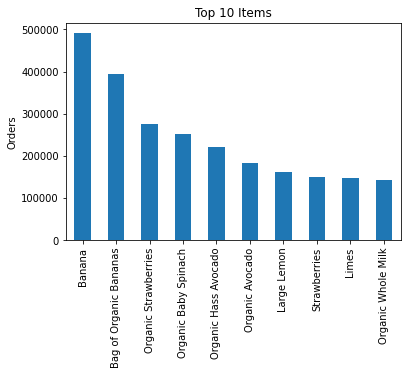

In [12]:
p = order_counts.plot(kind='bar', title='Top 10 Items')
p.set_ylabel('Orders');

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [13]:
# Load the sample dataframe I'm making it slightly bigger for fun 
# (adding my neighbor and I)
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1],
     [5,     20],
     [8,      7]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson', 'Karen Fisher', 'Patrice Mason'], 
    columns=['treatmenta', 'treatmentb'])

table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1
Karen Fisher,5.0,20
Patrice Mason,8.0,7


In [14]:
table_one = table1.reset_index()
tidy1 = table_one.melt(id_vars = 'index', value_vars = ['treatmenta', 'treatmentb'])
tidy1 = tidy1.rename(columns={'index': 'name', 'variable': 'treatment', 'value':'result'})
tidy1['treatment'] = tidy1['treatment'].str.replace('treatment', '')
tidy1

,name,treatment,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,Karen Fisher,a,5.0
4,Patrice Mason,a,8.0
5,John Smith,b,2.0
6,Jane Doe,b,11.0
7,Mary Johnson,b,1.0
8,Karen Fisher,b,20.0
9,Patrice Mason,b,7.0


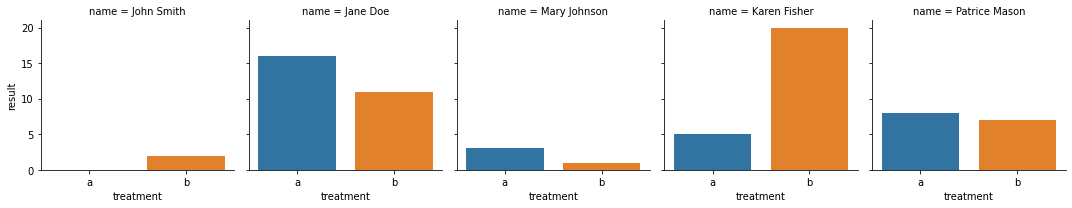

In [15]:
# This looks 'tidy' in that there is one observation and person per row.
# plotting as in lecture
import seaborn as sns
sns.catplot(x='treatment', y='result', col='name', kind='bar', data=tidy1, height=3);

In [16]:
# return tidy format to wide format, using pivot_table
wide1 = tidy1.pivot_table(index='name', columns='treatment', values='result')
wide1

treatment,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Karen Fisher,5.0,20.0
Mary Johnson,3.0,1.0
Patrice Mason,8.0,7.0


In [17]:
# Transpose the original table for next section ;)
table2 = table1.T
table2

,John Smith,Jane Doe,Mary Johnson,Karen Fisher,Patrice Mason
treatmenta,NaN,16.0,3.0,5.0,8.0
treatmentb,2.0,11.0,1.0,20.0,7.0


In [18]:
# table2 -> tidy
columns = table2.columns.tolist()
table_two = table2.reset_index()
table_two.rename(columns={'index': 'treatment'}, inplace=True)
table_two['treatment'] = table_two['treatment'].str.replace('treatment', '')
table_two

,treatment,John Smith,Jane Doe,Mary Johnson,Karen Fisher,Patrice Mason
0,a,NaN,16.0,3.0,5.0,8.0
1,b,2.0,11.0,1.0,20.0,7.0


In [19]:
tidy2 = table_two.melt(id_vars='treatment', value_vars=columns)
tidy2.rename(columns={'variable':'patient', 'value':'result'}, inplace=True)
tidy2

,treatment,patient,result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0
6,a,Karen Fisher,5.0
7,b,Karen Fisher,20.0
8,a,Patrice Mason,8.0
9,b,Patrice Mason,7.0


In [20]:
# This looks tidy, but I want it to be more patient-centric?
tidy2 = tidy2.reindex(columns=['patient', 'treatment', 'result'])
tidy2

,patient,treatment,result
0,John Smith,a,NaN
1,John Smith,b,2.0
2,Jane Doe,a,16.0
3,Jane Doe,b,11.0
4,Mary Johnson,a,3.0
5,Mary Johnson,b,1.0
6,Karen Fisher,a,5.0
7,Karen Fisher,b,20.0
8,Patrice Mason,a,8.0
9,Patrice Mason,b,7.0


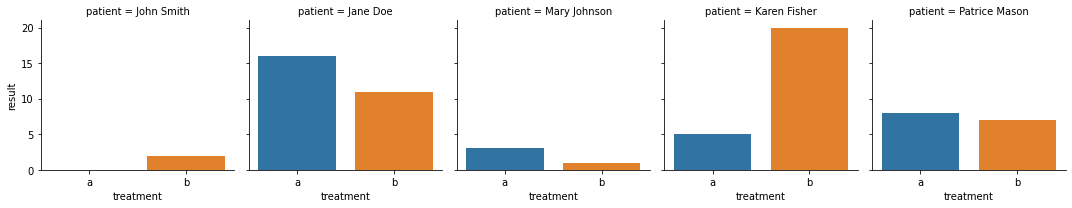

In [21]:
# Looks like we can plot it identitically now!
import seaborn as sns
sns.catplot(x='treatment', y='result', col='patient', kind='bar', data=tidy2, height=3);

In [22]:
# tidy -> table2
# I'd say this ought do the trick.
wide2 = tidy2.pivot_table(index='treatment', columns='patient', values='result')
wide2

patient,Jane Doe,John Smith,Karen Fisher,Mary Johnson,Patrice Mason
treatment,,,,,
a,16.0,NaN,5.0,3.0,8.0
b,11.0,2.0,20.0,1.0,7.0


In [0]:
# Load flights table and construct pivot table
flights = sns.load_dataset('flights')

In [24]:
print(flights.shape)
flights.head()

(144, 3)


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [25]:
# Flights Pivot Table
flights.pivot_table(index=['year', 'month'], values='passengers')

passengers
year month                
1949 January           112
     February          118
     March             132
     April             129
     May               121
...                    ...
1960 August            606
     September         508
     October           461
     November          390
     December          432

[144 rows x 1 columns]

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [5]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [6]:
##### YOUR CODE HERE #####
# loaded instacart files initially. Review what is in them.
!ls

aisles.csv	      order_products__prior.csv  products.csv
departments.csv       order_products__train.csv
instacart_2017_05_01  orders.csv


In [8]:
# I don't anticipate using the aisles.csv or the departments.csv again. Products.csv 
# will again be useful for the association of product-ids with names. I should only
# need two columns now. order_id and order_hour_of_day from orcers.csv
import pandas as pd
orders_df = pd.read_csv('orders.csv')[['order_id', 'order_hour_of_day']]
print(orders_df.shape)
orders_df.head()

(3421083, 2)


,order_id,order_hour_of_day
0,2539329,8
1,2398795,7
2,473747,12
3,2254736,7
4,431534,15


In [9]:
# Order of order_hour_of_day will be of interest, together with order_id as a common key
# look again at product_orders after reloading and reconcating. I will just need two columns
# here too: order_id and product_id
o_p_df1 = pd.read_csv('order_products__prior.csv')[['order_id', 'product_id']]
o_p_df2 = pd.read_csv('order_products__train.csv')[['order_id', 'product_id']]
order_products_df = pd.concat([o_p_df1, o_p_df2], axis=0)
print(order_products_df.shape)
order_products_df.head(10)

(33819106, 2)


,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035
5,2,17794
6,2,40141
7,2,1819
8,2,43668
9,3,33754


In [11]:
#Merging the two tables on order_id, we get the products ordered at each hour
product_orders_df = pd.merge(order_products_df, orders_df, on='order_id', how='inner')
product_orders_df.head()

,order_id,product_id,order_hour_of_day
0,2,33120,9
1,2,28985,9
2,2,9327,9
3,2,45918,9
4,2,30035,9


In [12]:
# And now I am interested in just orders from noon until midnight 
condition = (product_orders_df['order_hour_of_day'] >= 12)
product_orders_df = product_orders_df[condition]
print(product_orders_df.shape)
product_orders_df.sample(20)

(21899206, 3)


,order_id,product_id,order_hour_of_day
10576595,1116534,7304,14
18985459,2002344,30489,15
17946120,1892929,37322,14
18659273,1968244,13517,17
3060396,323067,39201,19
28655263,3022102,24852,14
16382107,1728240,28156,13
26989116,2845830,20213,12
21514832,2269378,432,15
25666390,2706911,8733,21


In [13]:
# And pull in the products themselves. Remembering I will only need product_id
# for joining and product_name
products_df = pd.read_csv('products.csv')[['product_id', 'product_name']]

# And in the end I just want order_hour_of_day and product_name, each item ordeered 
# those hours [12 - 24]
afternoon_products_df = pd.merge(product_orders_df, products_df, on='product_id', 
                                 how='inner')[['order_hour_of_day', 'product_name']]
print(afternoon_products_df.shape)
afternoon_products_df.sample(10)

(21899206, 2)


,order_hour_of_day,product_name
3716064,13,Organic Grape Tomatoes
7282201,21,Organic Basil
13405186,15,Organic Honey Nut O's Cereal
16754475,13,Whole Grain Organic Blueberry Waffles
2781410,14,Large Lemon
79484,13,Organic Baby Spinach
10836573,15,Organic Medium Salsa
15880394,18,Organic Crimini Mushrooms
4554094,23,Limes
7732446,12,Organic Sticks Low Moisture Part Skim Mozzarel...


In [14]:
# Top 25 items ordered in those hours? Not what we think...
popular = pd.Series(afternoon_products_df['product_name'].value_counts().
                    sort_values(ascending=False))
popular.head(25)

Banana                      313384
Bag of Organic Bananas      252095
Organic Strawberries        178282
Organic Baby Spinach        164262
Organic Hass Avocado        144474
Organic Avocado             121529
Large Lemon                 104517
Limes                        96661
Strawberries                 94653
Organic Whole Milk           90764
Organic Raspberries          90421
Organic Yellow Onion         76988
Organic Garlic               75497
Organic Zucchini             71902
Organic Blueberries          67542
Cucumber Kirby               66140
Organic Lemon                59593
Organic Grape Tomatoes       58152
Organic Fuji Apple           57298
Organic Cucumber             55883
Apple Honeycrisp Organic     55092
Seedless Red Grapes          54903
Honeycrisp Apple             52770
Organic Baby Carrots         51167
Yellow Onions                50864
Name: product_name, dtype: int64

In [20]:
# In fact, it seems a lot like the top 10 items earlier
top_products


['Banana',
 'Bag of Organic Bananas',
 'Organic Strawberries',
 'Organic Baby Spinach',
 'Organic Hass Avocado',
 'Organic Avocado',
 'Large Lemon',
 'Strawberries',
 'Limes',
 'Organic Whole Milk']

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####